The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


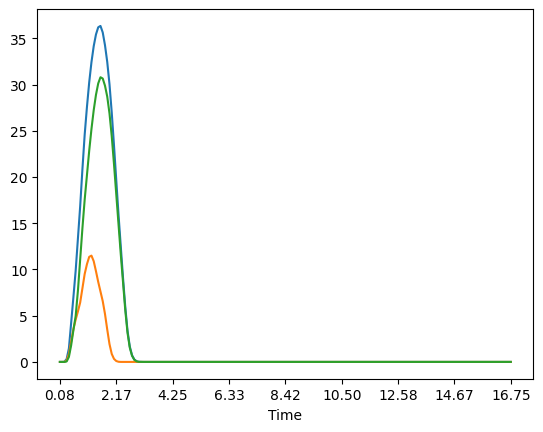

In [30]:
# Enable autoreload for automatic module reloading
%load_ext autoreload
%autoreload 2

from pathlib import Path
from pyrorb.experiments.base_experiment import BaseExperiment
from pyrorb.config_manager import ConfigManager
from pyrorb.runner import ExperimentRunner

# Load configuration
config_path = '/home/ashkan/projects/pyrorb/config.json'
config = ConfigManager(config_path)

# Retrieve dataset paths
dataset_path = Path(config.get('sample_dataset'))
catg_file_path = dataset_path / 'catg.catg'
stm_file_path = dataset_path / 'stm.stm'

# Define experiments
experiments = [
    BaseExperiment(catg_file_path, stm_file_path, kc=0.4, m=1.2, il=10.0, cl=5.0),
    BaseExperiment(catg_file_path, stm_file_path, kc=0.4, m=1.2, il=10.0, cl=50.0),
    BaseExperiment(catg_file_path, stm_file_path, kc=1.4, m=1.2, il=20.0, cl=5.0)
]

# Initialize the experiment runner
runner = ExperimentRunner(config)

# Register experiments
for exp in experiments:
    runner.register_experiment(exp)

# Submit experiment batches
runner.submit_batches()

# Plot results for each experiment
for exp in experiments:
    hydrograph = exp.result.hydrographs['Hyd009']
    hydrograph.plot()


plt.legend(['il=10, cl=5', ])



In [36]:
exp.stm_arin

'1%'